# tSNE Exploration Script

Using tSNE to see structures in the expression parameters

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import DePa

### Getting some batches of information

1. Expression
2. Shape
3. Jaw
4. Expression+Jaw
5. Expression+Jaw+Shape

In [ ]:
DePa.run_deca(image_path="/home/dietrich/Testing/DECA/DECA/TestSamples/Brenken_Rudolf/2017-01-13_00-00_Brenken-Rudolf_02/2017-01-13_001.JPG", results_path="/home/dietrich/Testing/DECA/DECA/TestResults", 
              only_encode=False, wo_shape=False)

In [ ]:
import torch

torch.cuda.empty_cache()

In [8]:
!CUDA_HOME=$CONDA_PREFIX

pretrained_modelpath = "/home/dietrich/Testing/DECA/DECA/training_results/expression_and_k/2024-01-29_without_shape_data_vggface2hq_e_50_b_32_k_4_lmk_1.0_exp_0.001_decapre/model.tar"
# Ausgangsverzeichnis
base_folder = "/home/dietrich/Testing/DECA/DECA/TestSamples/Probanden"
output_base_folder = "/home/dietrich/Testing/DECA/DECA/TestResults/Brenken_new"

blendshapes = DePa.blendshapes_for_dataset(base_folder, num_bs=50, pretrained_modelpath=pretrained_modelpath)

Proband_3
Proband_7
Proband_14
Proband_24
Proband_25
Proband_13
Proband_4
Proband_18
Proband_15
Proband_2
Proband_17
Proband_21
Proband_20
Proband_6
Proband_5
Proband_23
Proband_1
Proband_16
Proband_22
Proband_19


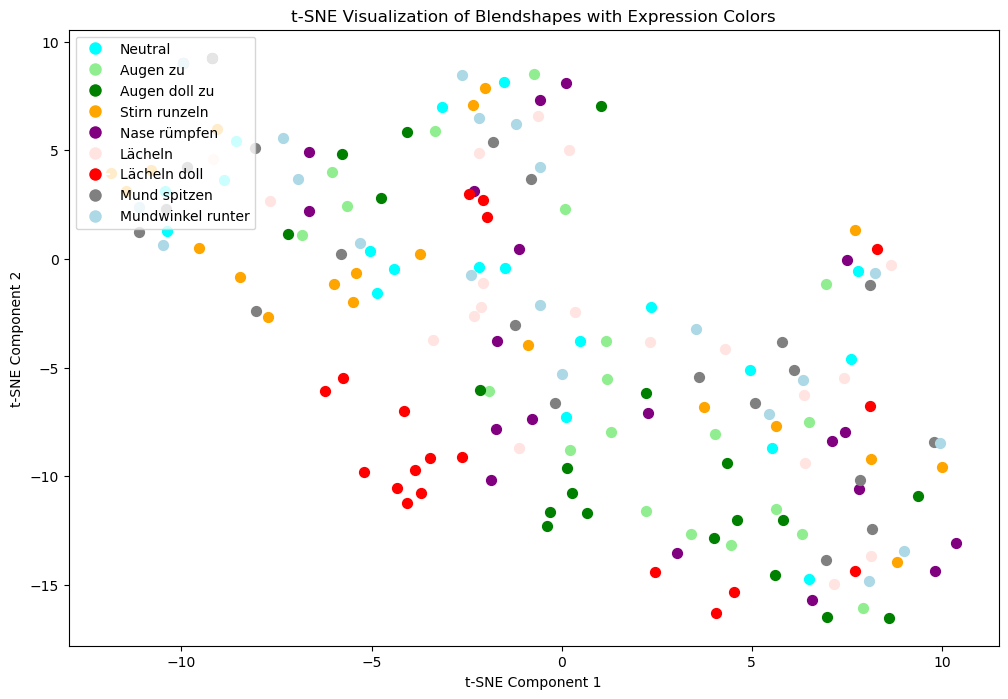

In [9]:
expressionnames = ["Neutral", "Augen zu", "Augen doll zu", "Stirn runzeln", "Nase rümpfen", "Lächeln", "Lächeln doll", "Mund spitzen", "Mundwinkel runter"]


DePa.show_tSNE(blendshapes, expressionnames, position="upper left")

In [10]:
!CUDA_HOME=$CONDA_PREFIX

pretrained_modelpath = "/home/dietrich/Testing/DECA/DECA/training_results/expression_and_k/2024-02-01_without_shape_data_vggface2hq_e_50_b_32_k_4_lmk_1.0_exp_0.0/model.tar"
# Ausgangsverzeichnis
base_folder = "/home/dietrich/Testing/DECA/DECA/TestSamples/Probanden"
output_base_folder = "/home/dietrich/Testing/DECA/DECA/TestResults/Brenken_new"

blendshapes = DePa.blendshapes_for_dataset(base_folder, num_bs=50, pretrained_modelpath=pretrained_modelpath)

Proband_3
Proband_7
Proband_14
Proband_24
Proband_25
Proband_13
Proband_4
Proband_18
Proband_15
Proband_2
Proband_17
Proband_21
Proband_20
Proband_6
Proband_5
Proband_23
Proband_1
Proband_16
Proband_22
Proband_19


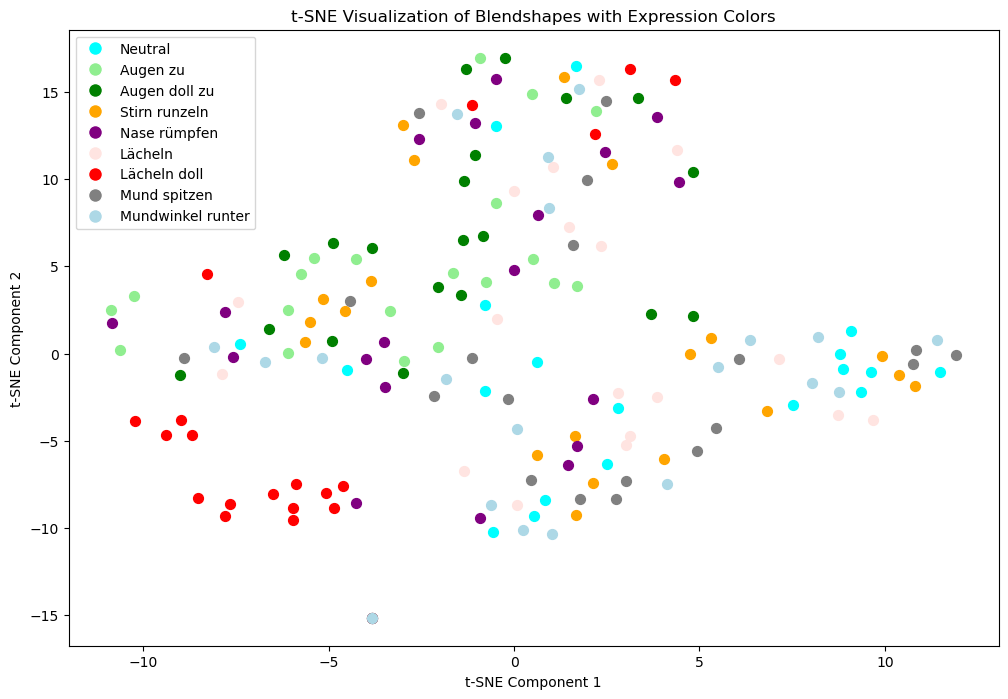

In [11]:
expressionnames = ["Neutral", "Augen zu", "Augen doll zu", "Stirn runzeln", "Nase rümpfen", "Lächeln", "Lächeln doll", "Mund spitzen", "Mundwinkel runter"]


DePa.show_tSNE(blendshapes, expressionnames, position="upper left")